In [133]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

#from library.sb_utils import save_file

### Objective
Create a model to assess the likelihood of a death by heart failure event.
This can be used to help hospitals in assessing the severity of patients with cardiovascular diseases.

## Loading data and exploration

In [134]:
df = pd.read_csv('/Users/gargi/Desktop/DSC_SB/heart_failure/heart_failure_clinical_records_dataset.csv')

In [135]:
df.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [136]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [137]:
df.shape

(299, 13)

In [138]:
df.index

RangeIndex(start=0, stop=299, step=1)

In [139]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [140]:
df.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

### missing values percent 

In [141]:
missing_percent = df.isnull().sum()*100
missing_percent_by_features = df.isnull().any().sum()*100

In [142]:
missing_percent = missing_percent.sort_values()

In [143]:
missing_percent
missing_percent_by_features

0

No missing values

## Categorical features

In [144]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## Review distribution of each feature

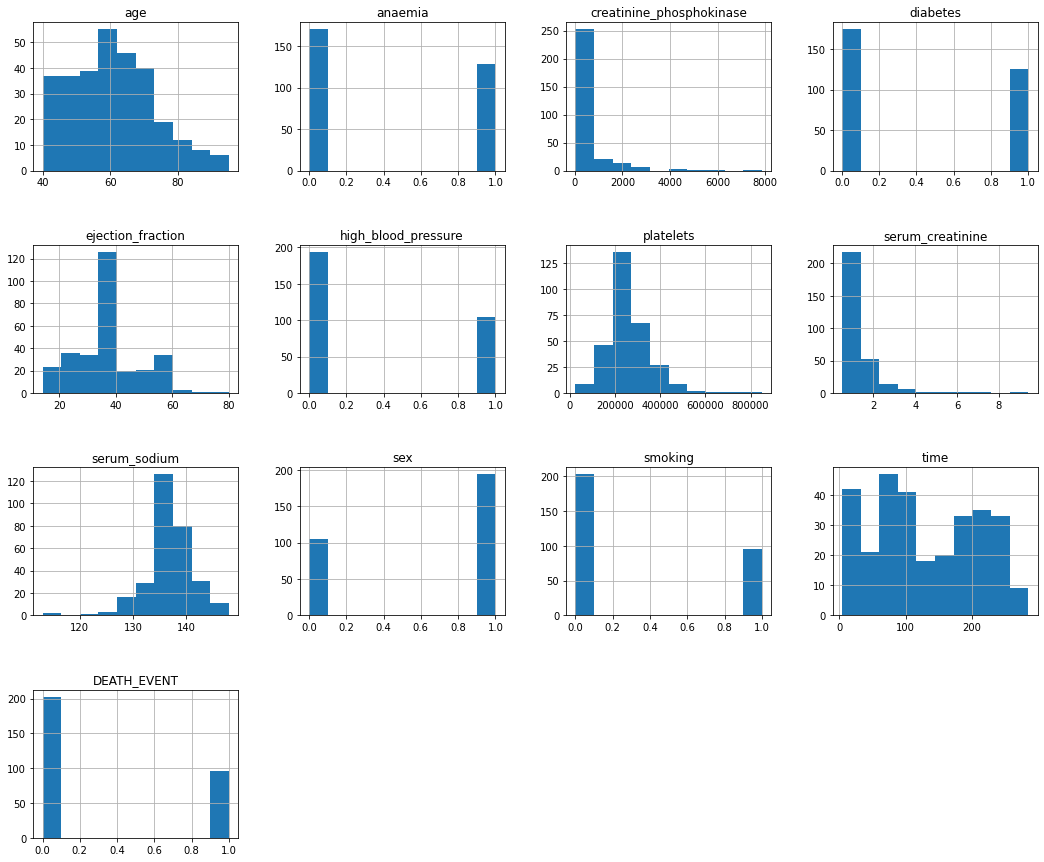

In [145]:
df.hist(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5);

## Distribution of features shows that:
1. age varies form 40 to 99; age distribution can further be studied
as there are two humps visible in the distribution, it is not a single normal distribution. 
changing bins can also help in understanding the distribution better!
2. death_events, sex, smoking, blood pressure, anaemia and diabetes are boolean in nature; meaning they answer in terms of yes or no, 
so a distribution understanding in not needed for them!
3. More information needed for time parameter

### Correlation between features

<AxesSubplot:>

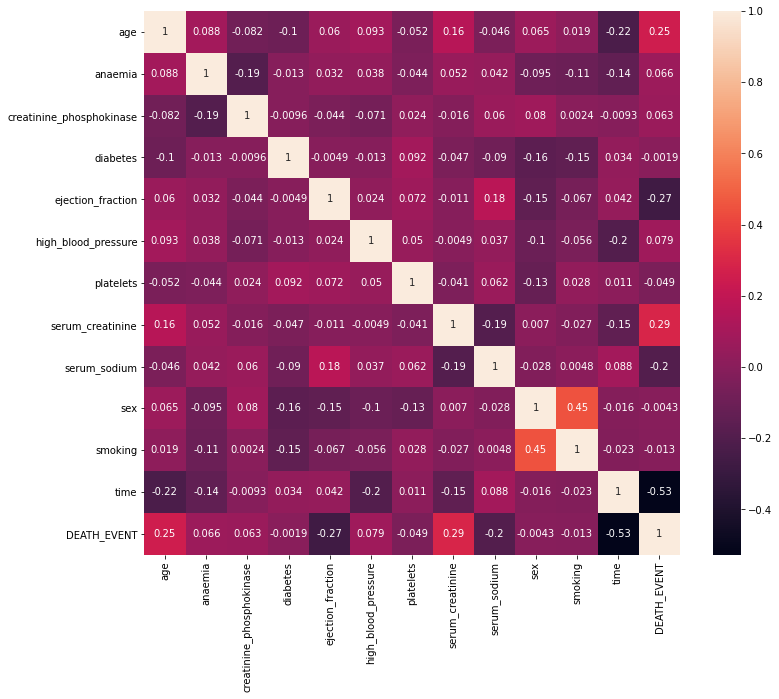

In [155]:
correlation_df = df.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(correlation_df, annot = True)


### Scatter plot of numeric features againt DEATH_EVENT

In [167]:
#Defining function for scatter plots
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'DEATH_EVENT', y = col, data=df, alpha=0.5)
        ax.set(xlabel='DEATH_EVENT', ylabel= col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [168]:
features = [x for x in df.columns]

In [169]:
features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

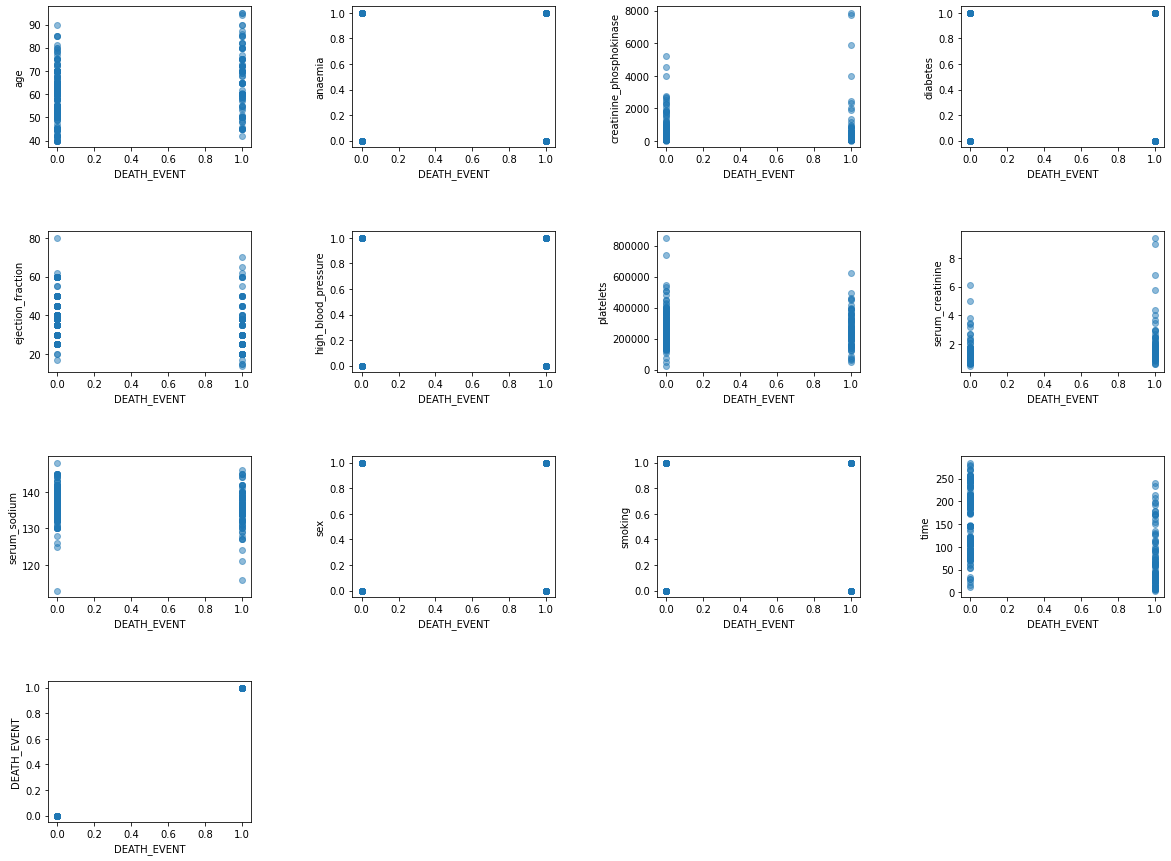

In [170]:
scatterplots(features, ncol = 4, figsize=(20, 15))

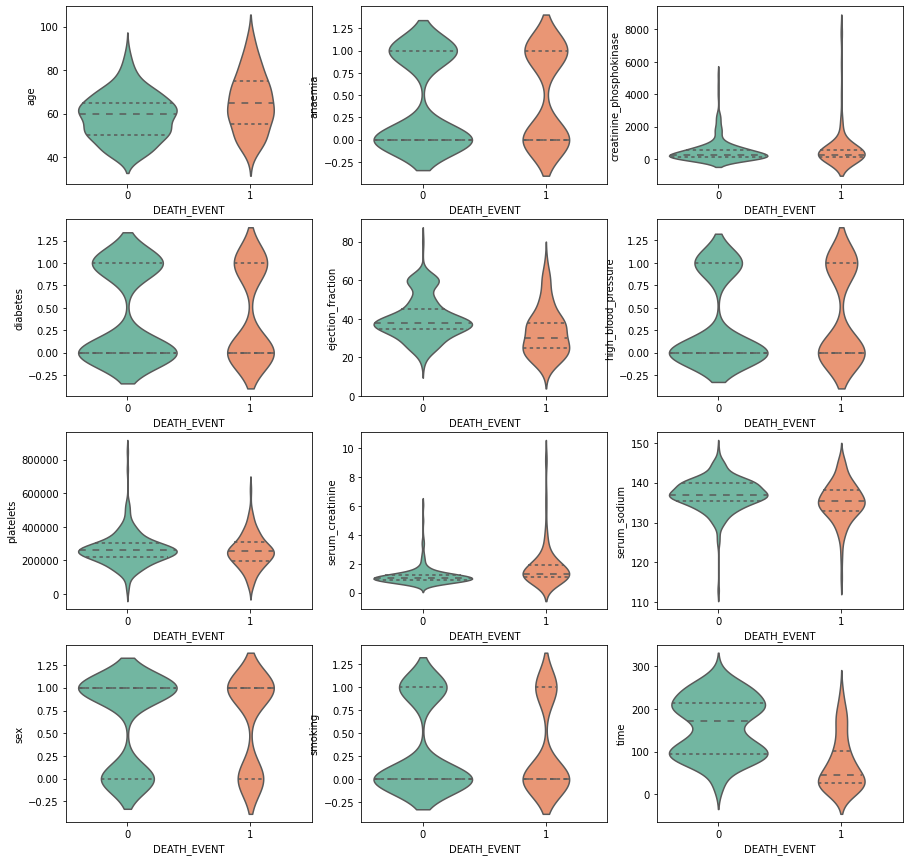

In [177]:
_,ax = plt.subplots(4,3,figsize = (15,15))
ax = ax.flatten()
for i in range (0,df.shape[1]-1):
    sns.violinplot(x = df.DEATH_EVENT,y = df.iloc[:,i],ax = ax[i],split=True, scale="count", inner="quartile",palette="Set2")

### Skewness in data